In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from common import NWSL, Colors, Fonts, Data, add_signature

In [16]:
# Calculate the total minutes for each season
totals = Data.get_nwsl_player_stats(include_early=True)
totals = totals.groupby(["season"]).agg(total_mins=("mins_played", "sum"))
totals

,total_mins
season,
2013,173887.0
2014,212635.0
2015,178137.0
2016,197949.0
2017,237369.0
2018,213828.0
2019,213648.0
2021,233422.0
2022,261180.0


In [17]:
year = int(totals.index.max())
year

2024

In [18]:
# Use the `explore` notebook to populate this list
SCHOOLS = {
    "University of North Carolina": "North Carolina",
    "University of California, Los Angeles": "UCLA",
    "Stanford University": "Stanford",
    "Penn State University": "Penn State",
    "Florida State University": "Florida State",
    "University of Virginia": "Virginia",
    "Santa Clara University": "Santa Clara",
    "University of Southern California": "Southern California",
    "University of Portland": "Portland",
    "University of Florida": "Florida",
    "Rutgers University": "Rutgers",
    "University of Notre Dame": "Notre Dame",
}

In [19]:
SCHOOLS_2024 = {
    "University of Virginia": "Virginia",
    "University of California, Los Angeles": "UCLA",
    "Florida State University": "Florida State",
    "Penn State University": "Penn State",
    "Stanford University": "Stanford",
    "University of North Carolina": "UNC",
    "High School": "High School",
    "University of Southern California": "Southern California",
    "University of South Carolina": "South Carolina",
    "Wake Forest University": "Wake Forest",
    "Santa Clara University": "Santa Clara",
    "Duke University": "Duke",
}

In [20]:
def get_data(schools):
    df = Data.get_nwsl_player_stats(include_early=True)
    df = (
        df.set_index("player")
        .join(Data.get_nwsl_player_schools().set_index("name"))
        .reset_index()
    )
    df = df[df["school"] != "International"]
    df = (
        df.groupby(["school", "season"])
        .agg(mins=("mins_played", "sum"))
        .sort_values("mins", ascending=False)
        .reset_index()
        .sort_values(["season", "mins"])
    )
    df = df.set_index("season").join(totals).reset_index()
    df["mins_proportion"] = df["mins"] / df["total_mins"]
    df = df[df["school"].isin(schools.keys())]
    df = df.pivot(index="school", columns="season", values="mins_proportion")
    return df

<Figure size 1008x720 with 0 Axes>

<Figure size 5600x4000 with 0 Axes>

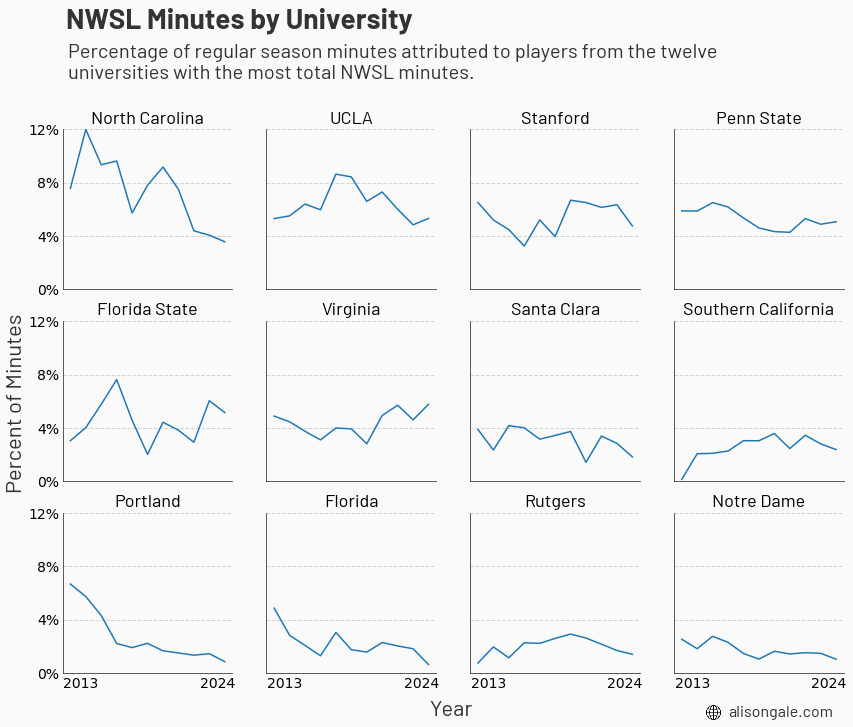

In [41]:
COLS = 4
ROWS = 3

is_all_time = True
schools = SCHOOLS if is_all_time else SCHOOLS_2024
df = get_data(schools)

# General
plt.clf()
plt.rcParams["figure.figsize"] = (14, 10)
plt.figure(dpi=400, facecolor=Colors.WHITE)
fig, axs = plt.subplots(ROWS, COLS)
fig.patch.set_facecolor(Colors.WHITE)

for i, school in enumerate(schools.keys()):
    ax = axs[int(i / COLS), i % COLS]
    ax.set_facecolor(Colors.WHITE)

    # Set title
    ax.set_title(schools[school], fontproperties=Fonts.BARLOW, size=18)

    # Plot data
    ax.plot(df.columns, df.loc[school], label=school)

    # Handle axes and ticks
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
    ax.set_ylim([0, 0.12])
    ax.set_yticks([0, 0.04, 0.08, 0.12])
    ax.tick_params(axis="both", which="both", length=0, labelsize=14)
    if i % COLS != 0:
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position("none")

    ax.set_xticks(["2013", str(year)])
    ax.set_xticks(df.columns, minor=True)

    if int(i / COLS) == ROWS - 1:
        ax.xaxis.set_ticklabels([2013, year])

        ax.xaxis.get_majorticklabels()[0].set_horizontalalignment("left")
        ax.xaxis.get_majorticklabels()[1].set_transform(
            ax.xaxis.get_majorticklabels()[1].get_transform()
            + mpl.transforms.ScaledTranslation(-0.1, 0, fig.dpi_scale_trans)
        )

        if is_all_time or i % COLS == 1 or i % COLS == 2:
            ax.xaxis.get_majorticklabels()[0].set_transform(
                ax.xaxis.get_majorticklabels()[0].get_transform()
                + mpl.transforms.ScaledTranslation(-0.1, 0, fig.dpi_scale_trans)
            )
    else:
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position("none")

    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color(Colors.BLACK)
    # Add gridlines
    ax.set_axisbelow(True)
    ax.grid(axis="y", which="both", ls="--", color=Colors.LIGHT_GRAY, linewidth=1)

# Axis labels
fig.supxlabel(
    "Year", x=0.51, y=0.06, fontproperties=Fonts.BARLOW, size=22, color=Colors.BLACK
)
fig.supylabel(
    "Percent of Minutes",
    x=0.07,
    fontproperties=Fonts.BARLOW,
    size=22,
    color=Colors.BLACK,
)

# Titles
plt.suptitle(
    "NWSL Minutes by University",
    x=0.3,
    y=1.05,
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=28,
    color=Colors.BLACK,
)
plt.figtext(
    0.13,
    0.95,
    "Percentage of regular season minutes attributed to players from the twelve\nuniversities with the most "
    + ("total" if is_all_time else str(year))
    + " NWSL minutes.",
    fontproperties=Fonts.BARLOW,
    fontsize=20,
    color=Colors.BLACK,
)

add_signature(fig, x=0.76, y=0.06, fs=16, w=0.02)

# Save image
plt.savefig(
    "images/minutes_by_university_"
    + ("all_time_" if is_all_time else "")
    + str(year)
    + ".png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)